# Изучение рынка заведений общественного питания Москвы

- Автор: Щербань Сергей
- Дата: 14.07.2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ рынка Москвы для определения подходящего места заведения общественного питания.  

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
4. Сформулировать выводы по проведённому анализу.

### Описание данных

- `/datasets/rest_info.csv` — информация о заведениях общественного питания;
- `/datasets/rest_price.csv` —  информация о среднем чеке в заведениях общественного питания

### Описание датасета `rest_info`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах;
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
- `seats` — количество посадочных мест

### Описание датасета `rest_price`

- `price` — категория цен в заведении;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`;
- `middle_coffee_cup` —  число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

## 1. Загрузка данных и знакомство с ними

- Загрузим данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import re

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем модуль, который позволяет отображать различные типы данных
from IPython.display import display

In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 8406 entries, 0 to 8405
,Data columns (total 9 columns):
, #   Column    Non-Null Count  Dtype  
,---  ------    --------------  -----  
, 0   id        8406 non-null   object 
, 1   name      8406 non-null   object 
, 2   category  8406 non-null   object 
, 3   address   8406 non-null   object 
, 4   district  8406 non-null   object 
, 5   hours     7870 non-null   object 
, 6   rating    8406 non-null   float64
, 7   chain     8406 non-null   int64  
, 8   seats     4795 non-null   float64
,dtypes: float64(2), int64(1), object(6)
,memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов в едином виде с нижним регистром.
- Все представленные данные хранятся в типах данных `object`, `int64` и `float64`. Значения в столбце `chain` - число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки). Тип данных для столбца `seats` можно изменить на целочисленный.
- Пропуски содержатся только в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4058 entries, 0 to 4057
,Data columns (total 5 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 4058 non-null   object 
, 1   price              3315 non-null   object 
, 2   avg_bill           3816 non-null   object 
, 3   middle_avg_bill    3149 non-null   float64
, 4   middle_coffee_cup  535 non-null    float64
,dtypes: float64(2), object(3)
,memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:

- Названия столбцов имеют стиль snake_case: разделяются нижним подчёркиванием (_) и все буквы пишутся в нижнем регистре.
- Типы данных соответствуют содержимому. Однако для анализа может понадобится перевести толбец `avg_bill` в числовой формат используя методы astype(str) и split(). Тип данных для столбца `middle_avg_bill` и `middle_coffee_cup` можно изменить на целочисленный.
- Пропуски присутствуют во всех столбцах.
- Значения в столбцах соответствуют описанию.


---

### Промежуточный вывод

Сделаем промежуточный вывод о полученных данных:

Первичное знакомство показывает, что данные смешанного качества — в первом датасете почти нет пропусков, а во информация носит преимущественно справочный характер. Так же, в таких столбцах как `middle_coffee_cup` необходимо исключить выбросы, если такие столбцы будут нужны для визуализации данных. Настало время следующего этапа — предобработки данных.

### Подготовка единого датафрейма

- Объединим данные двух датасетов в один, с которым и продолжим работу.

In [7]:
# Объединение датасетов по общему столбцу 'id'
merged_df = pd.merge(rest_info_df, rest_price_df, on='id', how='left')

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 8406 entries, 0 to 8405
,Data columns (total 13 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 8406 non-null   object 
, 1   name               8406 non-null   object 
, 2   category           8406 non-null   object 
, 3   address            8406 non-null   object 
, 4   district           8406 non-null   object 
, 5   hours              7870 non-null   object 
, 6   rating             8406 non-null   float64
, 7   chain              8406 non-null   int64  
, 8   seats              4795 non-null   float64
, 9   price              3315 non-null   object 
, 10  avg_bill           3816 non-null   object 
, 11  middle_avg_bill    3149 non-null   float64
, 12  middle_coffee_cup  535 non-null    float64
,dtypes: float64(4), int64(1), object(8)
,memory usage: 919.4+ KB


## 2. Предобработка данных

Подготовим данные к исследовательскому анализу:

- Изучим корректность типов данных и при необходимости проведем их преобразование.

In [9]:
# Оптимизируем целочисленный тип данных в датафрейме merged_df
merged_df['chain'] = pd.to_numeric(merged_df['chain'], downcast='integer')

merged_df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

- Изучим пропущенные значения в данных: посчитаеме их количество в каждом столбце датафрейме, изучим данные с пропущенными значениями и предположим гипотезы их появления. Проведем обработку пропущенных значений: можно заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [10]:
# Меняем 'Нет информации' на пустое значение
merged_df['hours'] = merged_df['hours'].replace('Нет информации', np.nan)

In [11]:
# Подсчитываем пропуски
missing_values_count = merged_df.isna().sum()

# Вычисляем общее количество строк
total_rows = len(merged_df)

# Создаём столбец с процентами пропусков и округляем до сотых
percentage_missing = (missing_values_count / total_rows) * 100
percentage_missing_rounded = percentage_missing.round(2)

# Отображаем результаты
results = pd.DataFrame({
    'Количество пропусков': missing_values_count,
    'Процент пропусков': percentage_missing_rounded
})

display(results)


,Количество пропусков,Процент пропусков
id,0,0.00
name,0,0.00
category,0,0.00
address,0,0.00
district,0,0.00
hours,537,6.39
rating,0,0.00
chain,0,0.00
seats,3611,42.96
price,5091,60.56


До предобработки в столбце `seats` было 3611 пропусков, в `middle_avg_bill` - 5257, `middle_coffee_cup` - 7871.
Сейчас там вместо пропусков значение '0'.
Строки содержащие пропуски в `hours` можно бы и удалить, их всего 537 из 8405.
Пока оставляю как есть, смотрим дальше.

- Проверим данные на явные и неявные дубликаты, например поля с названием и адресом заведения.

In [12]:
# Создаём новые столбцы для обработки данных
merged_df['name_sc'] = merged_df['name']
merged_df['address_sc'] = merged_df['address']

# Приводим столбцы 'name_sc' и 'address_sc' к нижнему регистру и убираем пробелы, заменяя их на нижнее подчёркивание
merged_df[['name_sc', 'address_sc']] = merged_df[['name_sc', 'address_sc']].apply(lambda x: x.str.lower().str.strip().str.replace(r'\s+', '_'))

# Подсчитываем дубликаты
duplicates_total = merged_df.duplicated().sum()
duplicates_name = merged_df['name'].duplicated().sum()
duplicates_name_sc = merged_df['name_sc'].duplicated().sum()
duplicates_address = merged_df['address'].duplicated().sum()
duplicates_address_sc = merged_df['address_sc'].duplicated().sum()
count_duplicates_sc = len(merged_df[merged_df.duplicated(subset=['name_sc', 'address_sc'])])
count_duplicates = len(merged_df[merged_df.duplicated(subset=['name', 'address'])])

# Выводим результаты
print(f"Количество дубликатов всего: {duplicates_total}")
print(f"Количество дубликатов в столбце 'name': {duplicates_name}")
print(f"Количество дубликатов в столбце 'name_sc': {duplicates_name_sc}")
print(f"Количество дубликатов в столбце 'address': {duplicates_address}")
print(f"Количество дубликатов в столбце 'address_sc': {duplicates_address_sc}")
print(f"Количество дубликатов в столбцах 'name_sc' и 'address_sc': {count_duplicates_sc}")
print(f"Количество дубликатов в столбцах 'name' и 'address': {count_duplicates}")

Количество дубликатов всего: 0
,Количество дубликатов в столбце 'name': 2792
,Количество дубликатов в столбце 'name_sc': 2894
,Количество дубликатов в столбце 'address': 2653
,Количество дубликатов в столбце 'address_sc': 2654
,Количество дубликатов в столбцах 'name_sc' и 'address_sc': 4
,Количество дубликатов в столбцах 'name' и 'address': 0


/tmp/ipykernel_99/3128544253.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
,  merged_df[['name_sc', 'address_sc']] = merged_df[['name_sc', 'address_sc']].apply(lambda x: x.str.lower().str.strip().str.replace(r'\s+', '_'))


В данных есть сетевые заведения, а значит дубли по полю name - это нормально. В одном здании может быть несколько заведение - тоже ок. Дублей с одним названием и адресом нет - отлично. 4 дубля с snake_case названием заведений и адресом - почистим.

In [13]:
# Чистка от неявных дублей
merged_df = merged_df.drop_duplicates(subset=['name_sc', 'address_sc'])

- Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [14]:
# Создадим функцию, которая вернет False или True в зависимости от значения столбца
def is_24_7(value):
    if value == 'ежедневно, круглосуточно':
        return True
    else: 
        return False
merged_df['is_24_7'] = merged_df['hours'].apply(is_24_7)

In [15]:
merged_df['is_24_7'].value_counts()

False    7672
True      730
Name: is_24_7, dtype: int64

---

### Промежуточный вывод

После предобработки данных напишем промежуточный вывод о проведённой работе.

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 8402 entries, 0 to 8405
,Data columns (total 16 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 8402 non-null   object 
, 1   name               8402 non-null   object 
, 2   category           8402 non-null   object 
, 3   address            8402 non-null   object 
, 4   district           8402 non-null   object 
, 5   hours              7866 non-null   object 
, 6   rating             8402 non-null   float64
, 7   chain              8402 non-null   int8   
, 8   seats              4792 non-null   float64
, 9   price              3315 non-null   object 
, 10  avg_bill           3816 non-null   object 
, 11  middle_avg_bill    3149 non-null   float64
, 12  middle_coffee_cup  535 non-null    float64
, 13  name_sc            8402 non-null   object 
, 14  address_sc         8402 non-null   object 
, 15  is_24_7            8402 non-null   bool   
,dtypes: 

На данный момент не потребовалось вносить критические изменения в датафрейм. Предоставленные данные хорошего качества и требуют не так много действий по предобработке. Для анализа предоставлены в полном объеме: названия заведений, адресс, административный район, категория заведения, рейтинг, а так же информация является ли заведение сетевым. Пропуски же содержатся в информации которая не находится в свободном доступе и это не является ошибкой в данных. 
- Изучены пропуски. Важные пропуски обнаружились в столбцах price, avg_bill, middle_avg_bill и в каждом составляют больше 50% данных столбца. Контекст данных не позволяет их заполнить. Учитывая это, оставим как есть.
- Данные проверили на явные и неявные дубликаты

## 3. Исследовательский анализ данных
Проведем исследовательский анализ исходных данных.

При исследовании данных используем визуализации.

После исследования каждого пункта оставляем небольшой комментарий.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по каждой категории. Результат сопроводим подходящей визуализацией.

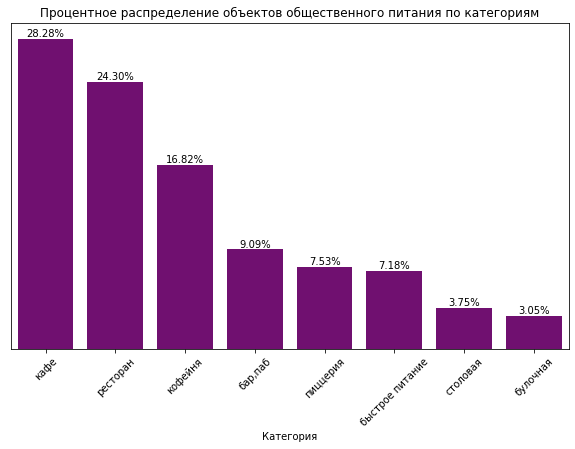

In [17]:
# Подсчитываем количество объектов по каждой категории
category_counts = merged_df['category'].value_counts(normalize=True)

# Визуализируем результаты с помощью гистограммы
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts, color='purple')
plt.title('Процентное распределение объектов общественного питания по категориям')
plt.xlabel('Категория')
plt.xticks(rotation=45)

# Скрываем шкалу Y
plt.gca().get_yaxis().set_visible(False)

# Добавляем значения над столбцами
for index, value in enumerate(category_counts):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')

plt.show()

In [18]:
# Подсчитываем количество объектов по каждой категории и получаем процентное распределение
category_counts = merged_df['category'].value_counts(normalize=True)

# Создаём сводную таблицу с количеством и процентами
category_table = pd.DataFrame({
    'Количество': merged_df['category'].value_counts(),
    'Процент': category_counts * 100
})

# Округляем значения
category_table['Количество'] = category_table['Количество'].apply(lambda x: round(x))
category_table['Процент'] = category_table['Процент'].apply(lambda x: f"{round(x, 1)}%")

# Меняем регистр категорий на первую букву заглавную
category_table.index = category_table.index.str.capitalize()

# Выводим сводную таблицу вертикально
display(category_table)

,Количество,Процент
Кафе,2376,28.3%
Ресторан,2042,24.3%
Кофейня,1413,16.8%
"Бар,паб",764,9.1%
Пиццерия,633,7.5%
Быстрое питание,603,7.2%
Столовая,315,3.7%
Булочная,256,3.0%


В Москве, по данным Яндекс.Карт и Яндекс.Бизнес на лето 2022 года, заведения общественного питания представлены следующими категориями: 
- половина рынка занята Кафе (28.3%) и Ресторанами (24.3%)
- четверть приходится на Кофейни (16.8%) и Бар/паб (9.1%)
- оставшаяся часть, это Пиццерия (7.5%), заведения Быстрого питания (7.2%), Столовые (3.7%) и Булочные (3.0%).

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределим заведений каждой категории в Центральном административном округе Москвы. Результат сопроводим подходящими визуализациями.

In [19]:
# Подсчитываем количество объектов по каждой категории и получаем процентное распределение
district_counts = merged_df['district'].value_counts(normalize=True)

# Создаём сводную таблицу с количеством и процентами
district_counts = pd.DataFrame({
    'Количество': merged_df['district'].value_counts(),
    'Процент': district_counts * 100
})

# Округляем значения
district_counts['Количество'] = district_counts['Количество'].apply(lambda x: round(x))
district_counts['Процент'] = district_counts['Процент'].apply(lambda x: f"{round(x, 1)}%")

# Меняем регистр категорий на первую букву заглавную
district_counts.index = district_counts.index.str.capitalize()

# Заменяем "административный округ" на "АО" в индексах
district_counts.index = district_counts.index.str.replace('административный округ', 'АО')

# Выводим сводную таблицу вертикально
display(district_counts)

,Количество,Процент
Центральный АО,2242,26.7%
Северный АО,898,10.7%
Южный АО,892,10.6%
Северо-восточный АО,890,10.6%
Западный АО,850,10.1%
Восточный АО,798,9.5%
Юго-восточный АО,714,8.5%
Юго-западный АО,709,8.4%
Северо-западный АО,409,4.9%


Распределение заведений общественного питания, действительно, выглядит ожидаемым:
- в Центральном административном округе больше 25% всех точек общепита Москвы
- в Северном, Южном, Северо-восточном и Западном округах по 10% от общего числа
- и менее 10% каждый для Восточного, Юго-восточного, Юго-западного и Северо-западного административных округов.

Для Зеленоградского, Троицкого и Новомосковского АО - информация отсутствует.

In [20]:
# Создаём сводную таблицу с подсчётом количества заведений по каждому сочетанию district-price
district_price_table = merged_df.pivot_table(index='district', columns='price', aggfunc='size', fill_value=0)

# Рассчитываем доли для каждой ценовой категории в каждом районе
district_price_table_percent = district_price_table.div(district_price_table.sum(axis=1), axis=0) * 100

# Округляем значения до сотых
district_price_table_percent = district_price_table_percent.round(2)

# Сортируем сводную таблицу по общему количеству заведений в каждом районе (по сумме по строкам)
district_price_sorted = district_price_table_percent.sort_values(by=district_price_table.columns.tolist(), ascending=False)

# Выводим отсортированную сводную таблицу
display(district_price_sorted)


price,высокие,выше среднего,низкие,средние
district,,,,
Центральный административный округ,22.38,19.82,2.81,55.00
Западный административный округ,16.61,22.15,3.58,57.65
Северный административный округ,14.58,13.70,5.25,66.47
Восточный административный округ,11.07,12.30,7.38,69.26
Северо-Западный административный округ,9.59,14.38,2.05,73.97
Юго-Западный административный округ,8.57,16.73,6.12,68.57
Северо-Восточный административный округ,5.83,13.27,6.80,74.11
Южный административный округ,5.79,17.04,6.75,70.42
Юго-Восточный административный округ,4.02,11.56,7.54,76.88


Дополнительная таблица для общего представления о расположении разных ценовых заведений по районам (в процентах).

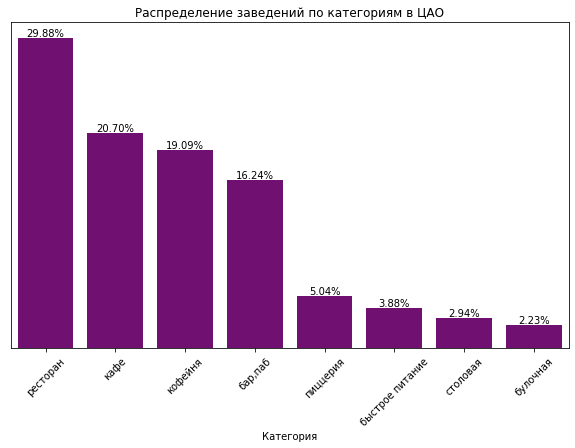

In [21]:
# Фильтруем данные для Центрального административного округа
central_df = merged_df[merged_df['district'] == 'Центральный административный округ']

# Подсчитываем количество заведений по каждой категории
central_category_counts = central_df['category'].value_counts(normalize=True)

# Визуализируем результаты с помощью гистограммы
plt.figure(figsize=(10, 6))
sns.barplot(x=central_category_counts.index, y=central_category_counts, color='purple')
plt.title('Распределение заведений по категориям в ЦАО')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)

# Скрываем шкалу Y
plt.gca().get_yaxis().set_visible(False)

# Добавляем значения над столбцами
for index, value in enumerate(central_category_counts):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom')

plt.show()

In [22]:
import pandas as pd

# Фильтруем данные для Центрального административного округа
central_df = merged_df[merged_df['district'] == 'Центральный административный округ']

# Подсчитываем количество заведений по каждой категории
category_cao_counts = central_df['category'].value_counts(normalize=True)

# Создаём сводную таблицу с количеством и процентами
category_cao = pd.DataFrame({
    'Количество': central_df['category'].value_counts(),
    'Процент': category_cao_counts * 100
})

# Округляем значения
category_cao['Количество'] = category_cao['Количество'].apply(lambda x: round(x))
category_cao['Процент'] = category_cao['Процент'].apply(lambda x: f"{round(x, 1)}%")

# Меняем регистр категорий на первую букву заглавную
category_cao.index = category_cao.index.str.capitalize()

# Выводим заголовок и таблицу
print("Распределение заведений по категориям в ЦАО:")
display(category_cao)

Распределение заведений по категориям в ЦАО:


,Количество,Процент
Ресторан,670,29.9%
Кафе,464,20.7%
Кофейня,428,19.1%
"Бар,паб",364,16.2%
Пиццерия,113,5.0%
Быстрое питание,87,3.9%
Столовая,66,2.9%
Булочная,50,2.2%


В Центральном административном округе распределение заведений следующее:
- Рестораны 29.9% - высокий процент ресторанов вполне указывает на то, что этот вид заведений считается выгодным в данном районе
- Кафе 20.7% - кафе в центре могут служить местом для встреч, работы удалённо или просто для отдыха, что делает их популярными среди жителей и гостей город
- Кофейни 19.1% - хорошую транспортную инфраструктуру и большое количество пешеходов, что обеспечивает постоянный поток потенциальных клиентов
- Бар/паб 16.2% - разнообразие баров, включая тематические и авторские заведения, позволяют им выделяться на остальном фоне и не терять клиентуру
- и остальные представлены в меньшем количестве - Пиццерии 5%, заведения Быстрого питания 3.9%, Столовые 2.9%, Булочные 2.2%

---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

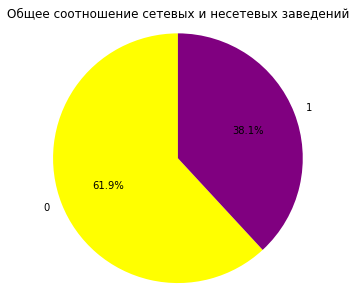


,Круговая диаграмма показывает соотношение сетевых (1) и несетевых (0) заведений, по данным Яндекс.Карт и Яндекс.Бизнес на лето 2022 года. 
,Отчетливо видно, что несетевой тип заведений преобладает на рынке общепита.
,


In [23]:
# Подсчитываем общее количество сетевых и несетевых заведений
total_chain_counts = merged_df['chain'].value_counts()

# Визуализируем общее соотношение сетевых и несетевых заведений в виде круговой диаграммы
plt.figure(figsize=(5, 5))
plt.pie(total_chain_counts, labels=total_chain_counts.index, colors=['yellow', 'purple'],
        autopct='%1.1f%%', startangle=90)
plt.title('Общее соотношение сетевых и несетевых заведений')
plt.axis('equal')  # Чтобы диаграмма была круглой
plt.show()

# Добавляем текстовое описание
print("""
Круговая диаграмма показывает соотношение сетевых (1) и несетевых (0) заведений, по данным Яндекс.Карт и Яндекс.Бизнес на лето 2022 года. 
Отчетливо видно, что несетевой тип заведений преобладает на рынке общепита.
""")


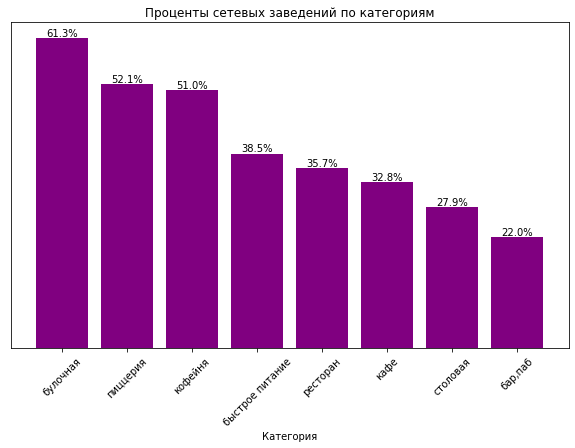

In [24]:
# Подсчитываем количество сетевых и несетевых заведений по каждой категории
category_chain_counts = merged_df.groupby('category')['chain'].value_counts().unstack()

# Рассчитываем общее количество заведений в каждой категории
total_count = category_chain_counts.sum(axis=1)

# Рассчитываем проценты сетевых заведений в каждой категории
category_chain_percentages = category_chain_counts[1] / total_count * 100

# Сортируем данные по процентам сетевых заведений в каждой категории
sorted_chain_categories = category_chain_percentages.sort_values(ascending=False).index
category_chain_percentages_sorted = category_chain_percentages[sorted_chain_categories]

# Визуализируем только проценты сетевых заведений
plt.figure(figsize=(10, 6))
plt.bar(category_chain_percentages_sorted.index, category_chain_percentages_sorted, color='purple')
plt.title('Проценты сетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Процент сетевых заведений')
plt.xticks(rotation=45)

# Скрываем шкалу Y
plt.gca().get_yaxis().set_visible(False)

# Отображаем процентные значения над столбиками
for i, v in enumerate(category_chain_percentages_sorted):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


In [25]:
# Создаем сводную таблицу
chain_table = pd.DataFrame({
    'Всего заведений': total_count[sorted_chain_categories],
    'Сетевые': category_chain_counts[1][sorted_chain_categories],
    'Несетевые': category_chain_counts[0][sorted_chain_categories],
    'Процент сетевых': category_chain_percentages_sorted
})

# Округляем значения
chain_table['Процент сетевых'] = chain_table['Процент сетевых'].apply(lambda x: f"{round(x, 1)}%")

# Сортируем таблицу по столбцу 'Процент сетевых' в порядке убывания
chain_table.sort_values(by='Процент сетевых', ascending=False, inplace=True)

# Меняем регистр категорий на первую букву заглавную
chain_table.index = chain_table.index.str.capitalize()

# Выводим сводную таблицу
display(chain_table)

,Всего заведений,Сетевые,Несетевые,Процент сетевых
category,,,,
Булочная,256,157,99,61.3%
Пиццерия,633,330,303,52.1%
Кофейня,1413,720,693,51.0%
Быстрое питание,603,232,371,38.5%
Ресторан,2042,729,1313,35.7%
Кафе,2376,779,1597,32.8%
Столовая,315,88,227,27.9%
"Бар,паб",764,168,596,22.0%


По данным статистики видно, что сетевыми являются:
- Булочные 61.3% - сетевые заведения часто имеют отработанные процессы управления, логистики и маркетинга, что позволяет им эффективнее конкурировать с небольшими независимыми "булками". А малый формат заведения позволяет открываться быстрее в новых локациях.
- Пиццерии 52.1% и Кофейни 51.0% - сетевые заведения по крупнее могут более активно использовать маркетинг и рекламные кампании для привлечения клиентов, что также способствует их распространению
- заведения Быстрого питания 38.5%, Рестораны 35.7%, Кафе 32.8%, Столовые 27.9%, Бар/паб 22.0%.

<Figure size 720x432 with 0 Axes>

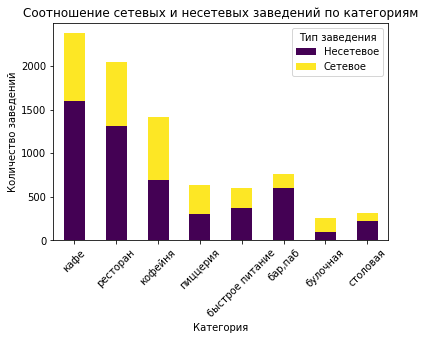

In [26]:
# Подсчитываем количество сетевых и несетевых заведений по каждой категории
category_chain = merged_df.groupby('category')['chain'].value_counts().unstack()

# Сортируем данные по количеству сетевых заведений в каждой категории
sorted_category_chain = category_chain[1].sort_values(ascending=False).index
category_chain_sorted = category_chain.loc[sorted_category_chain]

# Визуализируем соотношение сетевых и несетевых заведений по категориям
plt.figure(figsize=(10, 6))
category_chain_sorted.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Соотношение сетевых и несетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.legend(title='Тип заведения', labels=['Несетевое', 'Сетевое'])
plt.xticks(rotation=45)
plt.show()

В количественно выражении не так явно выделяются сетевые заведения, как в процентном сравнении. Зато четко видно перобладание несетевых заведений.

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


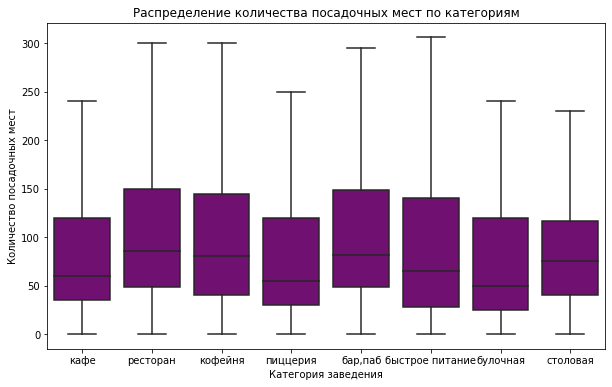

In [27]:
# Анализ распределения количества посадочных мест
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='seats', data=merged_df, showfliers=False, color='purple')
plt.title('Распределение количества посадочных мест по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')
plt.show()

In [28]:
# Группируем данные по категориям и определяем выбросы для каждой категории отдельно
def find_outliers_by_category(category_data):
    Q1 = category_data['seats'].quantile(0.25)
    Q3 = category_data['seats'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Исключаем нулевые значения
    return category_data[(category_data['seats'] < lower_bound) | (category_data['seats'] > upper_bound)]

outliers_by_category = merged_df.groupby('category').apply(find_outliers_by_category)

# Наиболее типичное количество посадочных мест
typical_seats = merged_df[merged_df['seats'] != 0].pivot_table(index='category', values='seats', aggfunc='median').sort_values(by='seats', ascending=False)
print("Наиболее типичное количество посадочных:")
print(typical_seats)


Наиболее типичное количество посадочных:
,                 seats
,category              
,ресторан          90.0
,бар,паб           84.0
,кофейня           80.0
,столовая          80.0
,быстрое питание   75.0
,кафе              60.0
,пиццерия          56.0
,булочная          52.0


В датафрейме присутствую выбросы. Большое количество нулевых и сильно выбивающихся из общей моды значений. Наличие нулевых можно обосновать отсутсвием информации или отсутсвием непосредственно посадочных мест, заведение вполне может работать только навынос. А вот огромные банкетные залы с 1288 посадочных мест для кофейни - подозрительно. Такие значения только исключать из статистики.

---

### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [29]:
merged_df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Можно предположить, что данные рейтинга имеют распределение, близкое к нормальному. Об этом говорит близость среднего и медианного значений. Однако значение стандартного отклонения довольно высокое — 0.47, и при среднем 4.3 это указывает, что данные могут иметь широкий разброс. Разница между минимальным и максимальным значениями это подтверждает.

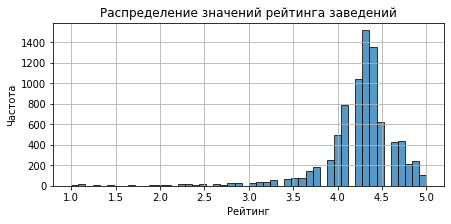

In [30]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
merged_df['rating'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=50, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

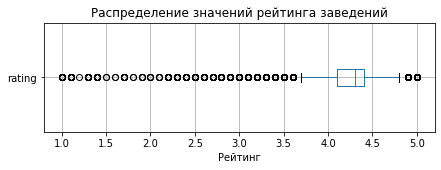

In [31]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце rating
merged_df.boxplot(column='rating', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений рейтинга заведений')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Распределение данных действительно выглядит нормальным, однако характеризуется широким разбросом и «хвостами» особенно в левой части гистограммы. Такие низкие и высокие значения можно отнести к выбросам. Однако сами значения, как минимальные, так и максимальные, не выглядят ошибкой, и такой рейтинг у завидений вполне допустим. Поэтому при анализе данных их оставим.

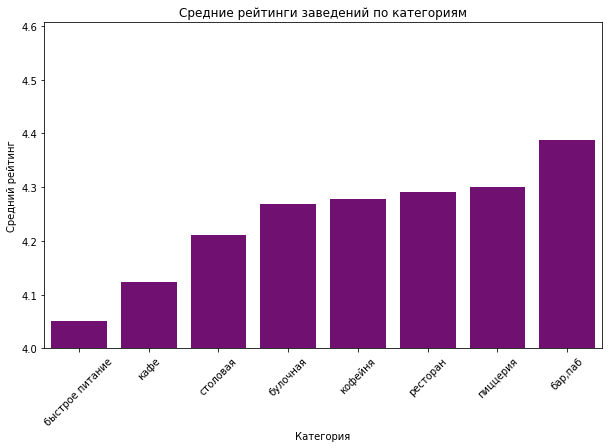

          category    rating
,2  быстрое питание  4.050249
,3             кафе  4.124285
,7         столовая  4.211429
,1         булочная  4.268359
,4          кофейня  4.277282
,6         ресторан  4.290402
,5         пиццерия  4.301264
,0          бар,паб  4.387696


In [32]:
# Группируем данные по категориям и рассчитываем средний рейтинг для каждой категории
average_ratings_by_category = merged_df.groupby('category')['rating'].mean().reset_index()

# Сортируем данные по среднему рейтингу
average_ratings_by_category = average_ratings_by_category.sort_values(by='rating', ascending=True)

# Визуализируем распределение средних рейтингов
plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='rating', data=average_ratings_by_category, color='purple')
plt.title('Средние рейтинги заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)

# Устанавливаем начало диапазона значений на оси Y с 4
plt.gca().set_ylim(bottom=4)

plt.show()
print(average_ratings_by_category)

Разброс значений по категориям идет от 4.05 до 4.38 - не сильно различаются.

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. 

In [33]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = merged_df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats']
,Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


Наибольшая корреляция рейтинга наблюдается с категорией цен в заведении (0.22), административным районом (0.20) и категорией заведения (0.19). Для остальных признаков коэффициент корреляции снижается.

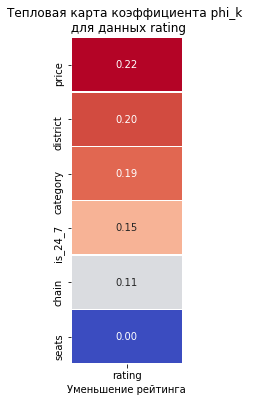

In [34]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками 
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Уменьшение рейтинга')

# Выводим график
plt.show() 

Теперь корреляция между рейтингом и другими признаками наглядно отображена

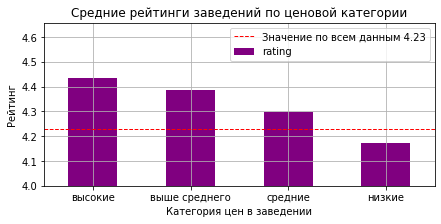

In [35]:
def plot_bar_plot(merged_df, groupby, value, aggfunc, title, ylabel, xlabel):
    grouped = merged_df.groupby(groupby).agg({value: aggfunc}).sort_values(by=value, ascending=False)
    grouped.plot(kind='bar',
                  title=title,
                  legend=True,
                  ylabel=ylabel,
                  xlabel=xlabel,
                  rot=0,
                  figsize=(7, 3),
                  color='purple')  # Устанавливаем цвет столбцов на фиолетовый

    # Рассчитываем общее значение value по всем данным
    mean_rating_share = merged_df.agg({value: aggfunc})[0]

    # Наносим на график линию с значением value по всем данным
    plt.axhline(mean_rating_share, color='red',
                linestyle='--', linewidth=1,
                label=f'Значение по всем данным {round(mean_rating_share, 4)}')

    plt.grid()
    plt.legend()
    # Устанавливаем начало диапазона значений на оси Y с 4
    plt.gca().set_ylim(bottom=4)
    plt.show()

# Применим функцию
plot_bar_plot(merged_df,
              groupby='price',
              value='rating',
              aggfunc='mean',
              title='Средние рейтинги заведений по ценовой категории',
              ylabel='Рейтинг',
              xlabel='Категория цен в заведении')

Более высокие цены ассоциируются с лучшим качеством ингредиентов, приготовлением и сервисом, что может приводить к более высоким оценкам со стороны клиентов. Иногда высокая цена сама по себе может создавать впечатление более высокого качества, даже если объективные показатели не всегда это подтверждают. Вывод:
- заведения с Высокими категориями цен имеют больший рейтинг по сравнения с Низкими.

In [36]:
# Фильтруем данные по price == 'высокие'
filtered_krug_df = merged_df[merged_df['price'] == 'высокие']

# Рассчитываем долю круглосуточных заведений среди отфильтрованных данных
mean_krug = filtered_krug_df['is_24_7'].mean()

# Выводим результат
print(f"Доля круглосуточных заведений среди общепитов с высокой ценовой категорией: {mean_krug:.2%}")

Доля круглосуточных заведений среди общепитов с высокой ценовой категорией: 4.81%


---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводим подходящими визуализациями.

<Figure size 720x432 with 0 Axes>

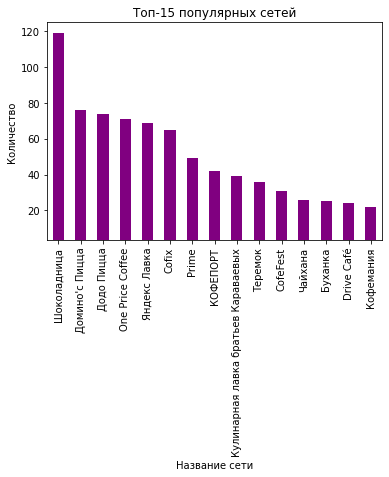

In [37]:
# Фильтруем данные, чтобы оставить только сетевые заведения
filtered_chain_df = merged_df[merged_df['chain'] == 1]

# Группируем данные по названиям и категориям, считаем количество упоминаний и рассчитываем средний рейтинг
top_15_name = filtered_chain_df.groupby(['name', 'category']).agg({'rating': 'mean'}).reset_index()
top_15_name['count'] = filtered_chain_df.groupby(['name', 'category']).size().values

# Сортируем по количеству упоминаний в порядке убывания и берём первые 15
top_15_name = top_15_name.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_15_name.plot(
    kind='bar',
    x='name',
    y='count',
    title='Топ-15 популярных сетей',
    legend=False,
    rot=90,  # Повернуть метки по оси X для лучшей читаемости
    ylabel='Количество',
    xlabel='Название сети',  # Изменено на 'Название сети'
    color='purple'  # Устанавливаем цвет столбцов на фиолетовый
)
# Устанавливаем начало диапазона значений на оси Y с 3.5
plt.gca().set_ylim(bottom=3.5)
plt.show()


In [38]:
# Сброс индекса
top_15_name = top_15_name.reset_index(drop=True)

display(top_15_name)

,name,category,rating,count
0,Шоколадница,кофейня,4.178151,119
1,Домино'с Пицца,пиццерия,4.169737,76
2,Додо Пицца,пиццерия,4.286486,74
3,One Price Coffee,кофейня,4.064789,71
4,Яндекс Лавка,ресторан,3.872464,69
5,Cofix,кофейня,4.075385,65
6,Prime,ресторан,4.114286,49
7,КОФЕПОРТ,кофейня,4.147619,42
8,Кулинарная лавка братьев Караваевых,кафе,4.394872,39
9,Теремок,ресторан,4.105556,36


Топ-5 сетевых заведения по количеству:
- кофейня, Шоколадница - 119 точек и 4.18 рейтинг
- пиццерия, Домино'с Пицца - 76 точек и 4.17 рейтинг
- пиццерия, Додо Пицца - 74 точек и 4.29 рейтинг

Топ-5 сетевых заведения по рейтингу:
- кофейня, Кофемания - 22 точки и 4.46 рейтинг
- булочная, Буханка - 25 точек и 4.42 рейтинг
- кафе, Кулинарная лавка братьев Караваевых - 39 точек и 4.39 рейтинг

Топ-1 по каждой категории заведения, что вошли в Топ-15:
- кофейня, Шоколадница - 119 точек и 4.18 рейтинг
- пиццерия, Домино'с Пицца - 76 точек и 4.17 рейтинг
- кофейня, One Price Coffee - 71 точка и 4.07 рейтинг
- ресторан, Яндекс Лавка - 69 точек и 3.87 рейтинг
- булочная, Буханка - 25 точек и 4.42 рейтинг

Сетевые заведения успешно развивают свою деятельность и имеют хорошую репутацию среди клиентов. Так же ображенные списки лидеров позволяют сделать вывод о том, какие заведения наиболее популярны и успешны в своих категориях.

---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводим подходящими визуализациями.


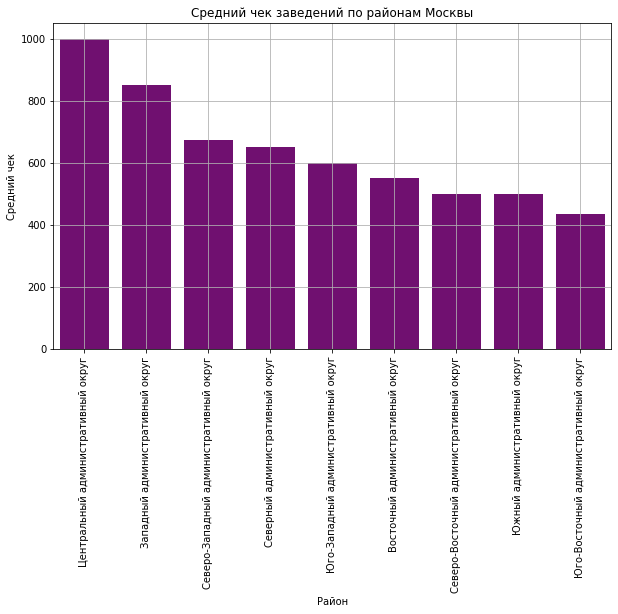

In [39]:
# Определяем выбросы с помощью IQR
Q1 = merged_df['middle_avg_bill'].quantile(0.25)
Q3 = merged_df['middle_avg_bill'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR

# Удаляем выбросы
merged_df_no_outliers = merged_df[~((merged_df['middle_avg_bill'] < Q1 - threshold) | (merged_df['middle_avg_bill'] > Q3 + threshold))]

# Группируем данные по районам и рассчитываем медиану чека для каждого района без выбросов
median_bills_by_district = merged_df_no_outliers.groupby('district')['middle_avg_bill'].median().reset_index()

# Сортируем данные по медиане чека по возрастанию
median_bills_by_district = median_bills_by_district.sort_values(by='middle_avg_bill', ascending=False)

# Визуализируем распределение медиан чеков
plt.figure(figsize=(10, 6))
sns.barplot(x='district', y='middle_avg_bill', data=median_bills_by_district, color='purple')
plt.title('Средний чек заведений по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Центральный административный округ действительно имеет самый высокий средний чек заведения. В этом районе можно ориентироваться на клиентов с более высокими доходами, предлагая соответствующие товары и услуги.

Это важная инормация, которая будет полезна для подведения результатов анализа и принятия дальнейших бизнес-решений.

In [40]:
# Сброс индексов
median_bills_by_district = median_bills_by_district.reset_index(drop=True)
display(median_bills_by_district)

,district,middle_avg_bill
0,Центральный административный округ,1000.0
1,Западный административный округ,850.0
2,Северо-Западный административный округ,675.0
3,Северный административный округ,650.0
4,Юго-Западный административный округ,600.0
5,Восточный административный округ,550.0
6,Северо-Восточный административный округ,500.0
7,Южный административный округ,500.0
8,Юго-Восточный административный округ,434.0


In [41]:
#merged_df.groupby('district')['middle_avg_bill'].describe()

Зависимость удаленности от центра - прямая. Чем дальше - тем ниже средний чек. Есть небольшое смещение к западной части Москвы.
После ЦАО идет Западный административный округ. В этом районе так же стоит рассматривать локацию для заведения общественного питания.

Остальные: Северо-Западный АО, Северный АО, Юго-Западный АО, Восточный АО, Северо-ВосточныйАО, Южный АО, и Юго-Восточный административный округ по данным на 2022 г. не так привлекательно. Но Москва постоянно меняется, и эти районы могут повысить свою ценность.

---

### Промежуточный вывод

Обобщим полученные результаты, выделим самое важное.

Анализ заведений общественного питания Москвы показал, что:

- Самые распространенные заведения это Ресторан, Кафе, Кофейня.
- Рынок заведений не являющимися сетевыми преимущественно занимает такая категория как Ресторан, а для сетевых это Ресторан, Кафе, Кофейня.
- Расположение точки в полной мере влияет на ее средний чек. Чем ближе к центру - тем выше цены.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируем итоговый вывод и рекомендации.

Выводы:
- Из 8402 заведений общественного питания, 69.4% - это Ресторан, Кафе, Кофейня.
- 26.68% рынка располагаются в Центральном административном округе Москвы.
- Заведения с категорией цен в заведении "высокие" имеют рейтинг выше, чем в заведениях с "средними" и "низкими" ценами.

Рекомендации:
- Административный район — Центральный и Западный АО отличные районы для разещения заведений. Именно здесь средний чек выше на 60%-40%. Высокая концентрация потенциальных клиентов и развитая транспортна доступность только увеличивают значимость этих локаций.
- Категория заведения - Рестораны, Кафе, Кофейни - 3 кита на которых держится общепит в ЦАО. 30% от всех заведений это Рестораны. Такой высокий процент указывает на то, что этот вид заведений считается выгодным. 20% Кафе и столько же Кофейни. Торговые моллы, достопримечательности, деловые центры - все это только увеличивает клиентооборот.   
- Круглосуточных заведений общественного питания с высокой категорией цен всего 4% от общего числа. Это мало говорит о их эффективности, поэтому не рекомендуем.
- Рекомендуем формировать постепенно свой бренд. Так появится возможность открыть сеть заведений общественного питания и быстрее увеличить количество точек заведения, повысить известность и сформировать лояльную клиентскую базу. Налаженная структура исключает ошибки которые можно допустить при несетевом заведении. 
- Если заведение Ресторан, то для него оптимально от 50 до 90 посадочных мест (допустимо и более если предлагается полный спектр услуг и рассчит идет на проведение банкетов, юбилеев и других мероприятий), для Кафе - от 20 до 60 ориентируясь на более повседневный формат посещения с постоянной клиентурой, а для Кофейни - хорошо бы сделать упор на обслуживании навынос и коротких быстрых визитах.
- В ЦАО 55% заведений с средним ценовым сегментом и 22.4% с высоким.Таким образом, ценовая категория заведения должна соответствовать экономическим возможностям и предпочтениям жителей района, чтобы заведение могло быть успешным. Правильно определяя и удовлетворяя потребности целевой аудитории, больше шансов привлечь и удержать клиентов.